# Consumindo APIs que precisam de keys

Fonte: https://fred.stlouisfed.org/

Agora, precisamos de uma key para consumir a API. Para isso, é necessário criar uma conta no site e gerar uma key. A key é um código que identifica o usuário e permite o acesso à API. Este é um cenário muito comum, pois muitas APIs são pagas e precisam de uma key para serem consumidas. Neste caso, a API é gratuita e a key é gerada automaticamente.

>  "This product uses the FRED® API but is not endorsed or certified by the Federal Reserve Bank of St. Louis."

## Usando variáveis de ambiente para armazenar a key

Um problema comum é que, ao compartilhar o código, a key fica exposta. Uma solução é armazenar a key em uma variável de ambiente. Variáveis de ambiente são variáveis que ficam armazenadas no sistema operacional e podem ser acessadas por qualquer programa.

Para não expor a key no código, vamos armazená-la em uma variável de ambiente. Para isso, vamos usar a biblioteca `python-dotenv`. Para instalar, basta rodar o comando abaixo no terminal:

```bash
pip install python-dotenv
```

Agora, vamos criar um arquivo `.env` na raiz do projeto e adicionar a key da API:

```bash
FRED_API_KEY=1234567890
```

Para ler a variável de ambiente, vamos usar a biblioteca `os`:

```python
from dotenv import load_dotenv
import os

load_dotenv()

key = os.getenv("FRED_API_KEY")
```



In [29]:
!pip install python-dotenv

In [30]:
from dotenv import load_dotenv
import os

load_dotenv()

key = os.getenv("FRED_API_KEY")

# key  # apenas verificando. NUNCA imprima a key no código


## Endpoint series/search

In [31]:
BUSCA_BR = "brazil"

URL_BRASIL_BUSCA = f"https://api.stlouisfed.org/fred/series/search?search_text={BUSCA_BR}&api_key={key}&file_type=json"


In [32]:
import requests 

resposta_br_buscas = requests.get(URL_BRASIL_BUSCA)

resposta_br_buscas.status_code

200

In [33]:
resposta_br_buscas.headers

{'Content-Type': 'application/json; charset=UTF-8', 'Expires': 'Fri, 17 Nov 2023 00:28:04 GMT', 'x-rate-limit-limit': '120', 'x-rate-limit-remaining': '120', 'Vary': 'Accept-Encoding', 'ETag': 'W/"20ff2c9f2c0aca9aa07e2df5416e6d11-gzip-gzip"', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Content-Length': '82136', 'Date': 'Fri, 17 Nov 2023 00:18:05 GMT', 'Connection': 'keep-alive'}

In [34]:
resposta_br_buscas.json()

{'realtime_start': '2023-11-16',
 'realtime_end': '2023-11-16',
 'order_by': 'search_rank',
 'sort_order': 'desc',
 'count': 1198,
 'offset': 0,
 'limit': 1000,
 'seriess': [{'id': 'CPALTT01BRM659N',
   'realtime_start': '2023-11-16',
   'realtime_end': '2023-11-16',
   'title': 'Consumer Price Index: All Items: Total for Brazil',
   'observation_start': '1980-12-01',
   'observation_end': '2023-08-01',
   'frequency': 'Monthly',
   'frequency_short': 'M',
   'units': 'Growth rate same period previous year',
   'units_short': 'Growth rate same period previous Yr.',
   'seasonal_adjustment': 'Not Seasonally Adjusted',
   'seasonal_adjustment_short': 'NSA',
   'last_updated': '2023-10-12 11:47:03-05',
   'popularity': 40,
   'group_popularity': 51,
   'notes': 'OECD Descriptor ID: CPALTT01\nOECD unit ID: PC\nOECD country ID: BRA\n\nAll OECD data should be cited as follows: OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database), https://dx.doi.org/10.178

In [35]:
type(resposta_br_buscas.json())

dict

In [36]:
resposta_br_buscas.json()['seriess'][0]

{'id': 'CPALTT01BRM659N',
 'realtime_start': '2023-11-16',
 'realtime_end': '2023-11-16',
 'title': 'Consumer Price Index: All Items: Total for Brazil',
 'observation_start': '1980-12-01',
 'observation_end': '2023-08-01',
 'frequency': 'Monthly',
 'frequency_short': 'M',
 'units': 'Growth rate same period previous year',
 'units_short': 'Growth rate same period previous Yr.',
 'seasonal_adjustment': 'Not Seasonally Adjusted',
 'seasonal_adjustment_short': 'NSA',
 'last_updated': '2023-10-12 11:47:03-05',
 'popularity': 40,
 'group_popularity': 51,
 'notes': 'OECD Descriptor ID: CPALTT01\nOECD unit ID: PC\nOECD country ID: BRA\n\nAll OECD data should be cited as follows: OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database), https://dx.doi.org/10.1787/data-00052-en (Accessed on date) Copyright, 2016, OECD. Reprinted with permission'}

In [37]:
resposta_br_buscas.json()['seriess'][-1]

{'id': 'BPBLSE01BRA188S',
 'realtime_start': '2023-11-16',
 'realtime_end': '2023-11-16',
 'title': 'Current Account Balance: Total Services for Brazil (DISCONTINUED)',
 'observation_start': '1996-01-01',
 'observation_end': '2014-01-01',
 'frequency': 'Annual',
 'frequency_short': 'A',
 'units': 'Percent of GDP',
 'units_short': '% of GDP',
 'seasonal_adjustment': 'Not Seasonally Adjusted',
 'seasonal_adjustment_short': 'NSA',
 'last_updated': '2017-04-16 22:11:48-05',
 'popularity': 0,
 'group_popularity': 1,
 'notes': 'OECD descriptor ID: BPBLSE01\nOECD unit ID: STSA\nOECD country ID: BRA\n\nAll OECD data should be cited as follows: OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database),http://dx.doi.org/10.1787/data-00052-en (Accessed on date)\nCopyright, 2016, OECD. Reprinted with permission.'}

### Paginação

In [38]:
URL_BRASIL_BUSCA

'https://api.stlouisfed.org/fred/series/search?search_text=brazil&api_key=e5e9fb85a0c0ab29a8df360541263d2a&file_type=json'

In [39]:
# limitando a 5 resultados
LIMITE = 5

URL_BRASIL_BUSCA_LIMITE = f"https://api.stlouisfed.org/fred/series/search?search_text={BUSCA_BR}&api_key={key}&file_type=json&limit={LIMITE}"

In [40]:
resposta_br_buscas_limite = requests.get(URL_BRASIL_BUSCA_LIMITE)

resposta_br_buscas_limite.status_code

200

In [41]:
resposta_br_buscas_limite.json()

{'realtime_start': '2023-11-16',
 'realtime_end': '2023-11-16',
 'order_by': 'search_rank',
 'sort_order': 'desc',
 'count': 1198,
 'offset': 0,
 'limit': 5,
 'seriess': [{'id': 'CPALTT01BRM659N',
   'realtime_start': '2023-11-16',
   'realtime_end': '2023-11-16',
   'title': 'Consumer Price Index: All Items: Total for Brazil',
   'observation_start': '1980-12-01',
   'observation_end': '2023-08-01',
   'frequency': 'Monthly',
   'frequency_short': 'M',
   'units': 'Growth rate same period previous year',
   'units_short': 'Growth rate same period previous Yr.',
   'seasonal_adjustment': 'Not Seasonally Adjusted',
   'seasonal_adjustment_short': 'NSA',
   'last_updated': '2023-10-12 11:47:03-05',
   'popularity': 40,
   'group_popularity': 51,
   'notes': 'OECD Descriptor ID: CPALTT01\nOECD unit ID: PC\nOECD country ID: BRA\n\nAll OECD data should be cited as follows: OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database), https://dx.doi.org/10.1787/d

In [42]:
# limitando a 5 resultados, mas com offset
LIMITE = 5
OFFSET = 5

URL_BRASIL_BUSCA_LIMITE = f"https://api.stlouisfed.org/fred/series/search?search_text={BUSCA_BR}&api_key={key}&file_type=json&limit={LIMITE}&offset={OFFSET}"

requests.get(URL_BRASIL_BUSCA_LIMITE).json()

{'realtime_start': '2023-11-16',
 'realtime_end': '2023-11-16',
 'order_by': 'search_rank',
 'sort_order': 'desc',
 'count': 1198,
 'offset': 5,
 'limit': 5,
 'seriess': [{'id': 'CPALTT01BRM657N',
   'realtime_start': '2023-11-16',
   'realtime_end': '2023-11-16',
   'title': 'Consumer Price Index: All Items: Total for Brazil',
   'observation_start': '1980-01-01',
   'observation_end': '2023-08-01',
   'frequency': 'Monthly',
   'frequency_short': 'M',
   'units': 'Growth rate previous period',
   'units_short': 'Growth rate previous period',
   'seasonal_adjustment': 'Not Seasonally Adjusted',
   'seasonal_adjustment_short': 'NSA',
   'last_updated': '2023-10-12 11:47:04-05',
   'popularity': 6,
   'group_popularity': 51,
   'notes': 'OECD Descriptor ID: CPALTT01\nOECD unit ID: PC\nOECD country ID: BRA\n\nAll OECD data should be cited as follows: OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database), https://dx.doi.org/10.1787/data-00052-en (Access

### Passando para um dataframe

In [43]:
# voltando a usar o limite padrão (1000)
import pandas as pd

df_busca = pd.DataFrame(resposta_br_buscas.json()["seriess"])
df_busca.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,CPALTT01BRM659N,2023-11-16,2023-11-16,Consumer Price Index: All Items: Total for Brazil,1980-12-01,2023-08-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2023-10-12 11:47:03-05,40,51,OECD Descriptor ID: CPALTT01\nOECD unit ID: PC...
1,NGDPRSAXDCBRQ,2023-11-16,2023-11-16,Real Gross Domestic Product for Brazil,1996-01-01,2023-04-01,Quarterly,Q,Domestic Currency,Domestic Currency,Seasonally Adjusted,SA,2023-09-18 07:53:04-05,48,50,NaN
2,BRACPIALLMINMEI,2023-11-16,2023-11-16,Consumer Price Index: All Items: Total for Brazil,1979-12-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-10-12 11:47:03-05,25,51,OECD Descriptor ID: CPALTT01\nOECD unit ID: ID...
3,BRACPIALLAINMEI,2023-11-16,2023-11-16,Consumer Price Index: All Items: Total for Brazil,1980-01-01,2022-01-01,Annual,A,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-02-14 11:48:02-06,21,51,OECD Descriptor ID: CPALTT01\nOECD unit ID: ID...
4,BRACPALTT01IXNBM,2023-11-16,2023-11-16,Consumer Price Index: All Items: Total for Brazil,1979-12-01,2023-08-01,Monthly,M,Index source base,Index source base,Not Seasonally Adjusted,NSA,2023-10-12 11:47:05-05,9,51,OECD Descriptor ID: CPALTT01\nOECD unit ID: ID...


In [44]:
df_busca.tail()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
995,LFINTTTTBRQ647N,2023-11-16,2023-11-16,Inactive Population: Aged 15 and over: All Per...,2002-04-01,2015-07-01,Quarterly,Q,Persons,Persons,Not Seasonally Adjusted,NSA,2022-09-14 16:02:34-05,0,1,OECD Descriptor ID: LFINTTTT\nOECD unit ID: PE...
996,LFINTTTTBRQ647S,2023-11-16,2023-11-16,Inactive Population: Aged 15 and over: All Per...,2002-04-01,2015-07-01,Quarterly,Q,Persons,Persons,Seasonally Adjusted,SA,2022-09-14 15:10:00-05,0,1,OECD Descriptor ID: LFINTTTT\nOECD unit ID: PE...
997,NINVSAXDCBRQ,2023-11-16,2023-11-16,Nominal Changes in Inventories for Brazil,1996-01-01,2023-04-01,Quarterly,Q,Domestic Currency,Domestic Currency,Seasonally Adjusted,SA,2023-10-02 07:53:03-05,0,1,NaN
998,NINVXDCBRA,2023-11-16,2023-11-16,Nominal Changes in Inventories for Brazil,1996-01-01,2022-01-01,Annual,A,Domestic Currency,Domestic Currency,Not Seasonally Adjusted,NSA,2023-04-26 11:22:35-05,0,1,NaN
999,BPBLSE01BRA188S,2023-11-16,2023-11-16,Current Account Balance: Total Services for Br...,1996-01-01,2014-01-01,Annual,A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2017-04-16 22:11:48-05,0,1,OECD descriptor ID: BPBLSE01\nOECD unit ID: ST...


In [45]:
df_busca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         1000 non-null   object
 1   realtime_start             1000 non-null   object
 2   realtime_end               1000 non-null   object
 3   title                      1000 non-null   object
 4   observation_start          1000 non-null   object
 5   observation_end            1000 non-null   object
 6   frequency                  1000 non-null   object
 7   frequency_short            1000 non-null   object
 8   units                      1000 non-null   object
 9   units_short                1000 non-null   object
 10  seasonal_adjustment        1000 non-null   object
 11  seasonal_adjustment_short  1000 non-null   object
 12  last_updated               1000 non-null   object
 13  popularity                 1000 non-null   int64 
 14  group_pop

In [46]:
# procurando por "dollar" no nome da série
df_busca[df_busca['title'].str.contains('dollar', case=False)]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
15,DEXBZUS,2023-11-16,2023-11-16,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-02,2023-11-09,Daily,D,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2023-11-13 15:20:06-06,49,53,Noon buying rates in New York City for cable t...
16,EXBZUS,2023-11-16,2023-11-16,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-01,2023-10-01,Monthly,M,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2023-11-06 15:19:08-06,35,53,Averages of daily figures. Noon buying rates i...
18,AEXBZUS,2023-11-16,2023-11-16,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-01,2022-01-01,Annual,A,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2023-01-03 16:56:04-06,9,53,Averages of daily figures. Noon buying rates i...
73,CCUSMA02BRM618N,2023-11-16,2023-11-16,Currency Conversions: US Dollar Exchange Rate:...,1960-01-01,2023-08-01,Monthly,M,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2023-10-12 11:47:06-05,7,11,OECD Descriptor ID: CCUSMA02\nOECD unit ID: BR...
74,CCUSMA02BRA618N,2023-11-16,2023-11-16,Currency Conversions: US Dollar Exchange Rate:...,1960-01-01,2022-01-01,Annual,A,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2023-02-14 12:02:37-06,4,11,OECD Descriptor ID: CCUSMA02\nOECD unit ID: BR...
75,CCUSMA02BRQ618N,2023-11-16,2023-11-16,Currency Conversions: US Dollar Exchange Rate:...,1960-01-01,2023-04-01,Quarterly,Q,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2023-08-10 15:38:04-05,2,11,OECD Descriptor ID: CCUSMA02\nOECD unit ID: BR...
197,CCUSSP02BRA650N,2023-11-16,2023-11-16,Currency Conversions: US Dollar Exchange Rate:...,1964-01-01,2022-01-01,Annual,A,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2023-02-14 12:02:36-06,3,4,OECD Descriptor ID: CCUSSP02\nOECD unit ID: BR...
240,CCUSSP02BRM650N,2023-11-16,2023-11-16,Currency Conversions: US Dollar Exchange Rate:...,1964-01-01,2023-08-01,Monthly,M,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2023-10-12 11:51:21-05,1,4,OECD Descriptor ID: CCUSSP02\nOECD unit ID: BR...
241,CCUSSP02BRQ650N,2023-11-16,2023-11-16,Currency Conversions: US Dollar Exchange Rate:...,1964-01-01,2023-04-01,Quarterly,Q,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2023-08-10 15:38:04-05,1,4,OECD Descriptor ID: CCUSSP02\nOECD unit ID: BR...
280,FXRATEBRA618NUPN,2023-11-16,2023-11-16,Exchange Rate to U.S. Dollar for Brazil,1950-01-01,2010-01-01,Annual,A,National Currency Units per US Dollar,National Currency Units per US $,Not Seasonally Adjusted,NSA,2012-09-17 12:02:54-05,3,3,For more information and proper citation see h...


In [47]:
SERIE_DOLLAR = "DEXBZUS"

URL_SERIE_DOLLAR = f"https://api.stlouisfed.org/fred/series/observations?series_id={SERIE_DOLLAR}&api_key={key}&file_type=json"

In [48]:
resposta_dollar = requests.get(URL_SERIE_DOLLAR)

resposta_dollar.status_code

200

In [49]:
resposta_dollar.json()

{'realtime_start': '2023-11-16',
 'realtime_end': '2023-11-16',
 'observation_start': '1600-01-01',
 'observation_end': '9999-12-31',
 'units': 'lin',
 'output_type': 1,
 'file_type': 'json',
 'order_by': 'observation_date',
 'sort_order': 'asc',
 'count': 7529,
 'offset': 0,
 'limit': 100000,
 'observations': [{'realtime_start': '2023-11-16',
   'realtime_end': '2023-11-16',
   'date': '1995-01-02',
   'value': '0.8440'},
  {'realtime_start': '2023-11-16',
   'realtime_end': '2023-11-16',
   'date': '1995-01-03',
   'value': '0.8450'},
  {'realtime_start': '2023-11-16',
   'realtime_end': '2023-11-16',
   'date': '1995-01-04',
   'value': '0.8450'},
  {'realtime_start': '2023-11-16',
   'realtime_end': '2023-11-16',
   'date': '1995-01-05',
   'value': '0.8430'},
  {'realtime_start': '2023-11-16',
   'realtime_end': '2023-11-16',
   'date': '1995-01-06',
   'value': '0.8400'},
  {'realtime_start': '2023-11-16',
   'realtime_end': '2023-11-16',
   'date': '1995-01-09',
   'value': '0.8

In [50]:
df_dollar = pd.DataFrame(resposta_dollar.json()['observations'])
df_dollar.head()

,realtime_start,realtime_end,date,value
0,2023-11-16,2023-11-16,1995-01-02,0.8440
1,2023-11-16,2023-11-16,1995-01-03,0.8450
2,2023-11-16,2023-11-16,1995-01-04,0.8450
3,2023-11-16,2023-11-16,1995-01-05,0.8430
4,2023-11-16,2023-11-16,1995-01-06,0.8400


In [51]:
df_dollar.tail()

,realtime_start,realtime_end,date,value
7524,2023-11-16,2023-11-16,2023-11-03,4.8879
7525,2023-11-16,2023-11-16,2023-11-06,4.8921
7526,2023-11-16,2023-11-16,2023-11-07,4.8677
7527,2023-11-16,2023-11-16,2023-11-08,4.8905
7528,2023-11-16,2023-11-16,2023-11-09,4.9037


In [52]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7529 entries, 0 to 7528
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  7529 non-null   object
 1   realtime_end    7529 non-null   object
 2   date            7529 non-null   object
 3   value           7529 non-null   object
dtypes: object(4)
memory usage: 235.4+ KB


In [53]:
df_dollar = df_dollar.drop(columns=["realtime_start","realtime_end"])

df_dollar["date"] = pd.to_datetime(df_dollar["date"])

In [54]:
df_dollar.head()

,date,value
0,1995-01-02,0.8440
1,1995-01-03,0.8450
2,1995-01-04,0.8450
3,1995-01-05,0.8430
4,1995-01-06,0.8400


In [55]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7529 entries, 0 to 7528
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7529 non-null   datetime64[ns]
 1   value   7529 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 117.8+ KB


In [56]:
df_dollar["value"].value_counts()

value
.         289
1.8050     14
1.8000      8
1.7700      8
0.9190      7
         ... 
1.5898      1
1.5877      1
1.5954      1
1.5935      1
4.9037      1
Name: count, Length: 5618, dtype: int64

In [57]:
df_dollar["value"] = df_dollar["value"].replace(".", float("NaN"))

In [58]:
df_dollar["value"].value_counts()

value
1.8050    14
1.7700     8
1.8000     8
0.9190     7
1.7900     7
          ..
1.5898     1
1.5877     1
1.5954     1
1.5935     1
4.9037     1
Name: count, Length: 5617, dtype: int64

In [59]:
df_dollar["value"] = df_dollar["value"].astype(float)

In [60]:
df_dollar.head()

,date,value
0,1995-01-02,0.844
1,1995-01-03,0.845
2,1995-01-04,0.845
3,1995-01-05,0.843
4,1995-01-06,0.840


In [61]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7529 entries, 0 to 7528
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7529 non-null   datetime64[ns]
 1   value   7240 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 117.8 KB


In [62]:
df_dollar = df_dollar.set_index("date")

In [63]:
df_dollar.head()

,value
date,
1995-01-02,0.844
1995-01-03,0.845
1995-01-04,0.845
1995-01-05,0.843
1995-01-06,0.840


C:\Users\vinif\anaconda3\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\vinif\anaconda3\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\vinif\anaconda3\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
C:\Users\vinif\anaconda3\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.locator()
C:\Users\vinif\anaconda3\Lib\site-pack

<Axes: xlabel='date'>

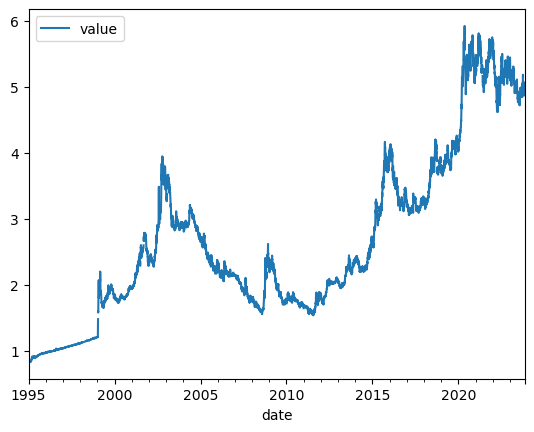

In [64]:
df_dollar.plot()

C:\Users\vinif\anaconda3\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\vinif\anaconda3\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\vinif\anaconda3\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
C:\Users\vinif\anaconda3\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return self.major.locator()
C:\Users\vinif\anaconda3\Lib\site-pack

<Axes: xlabel='date'>

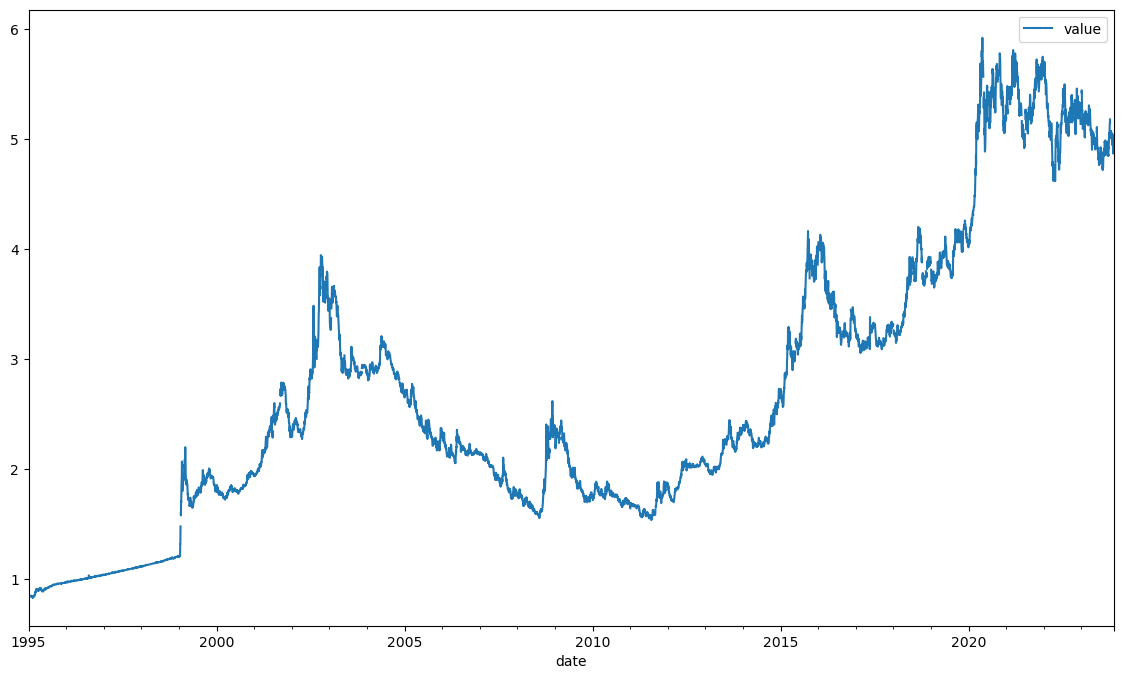

In [65]:
df_dollar.plot(figsize=(14,8))

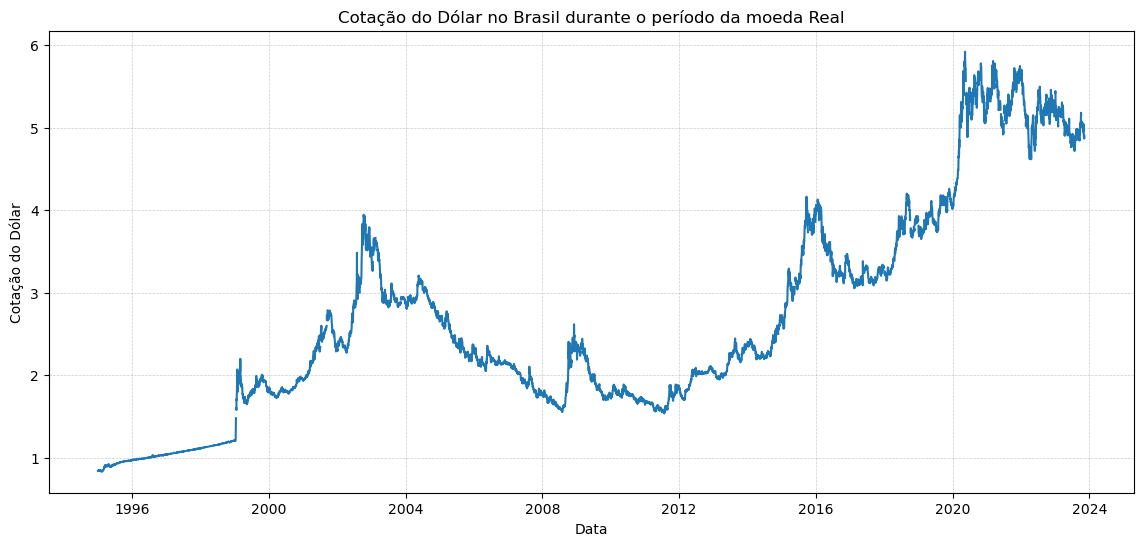

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,6))

ax.plot(df_dollar.index, df_dollar["value"])
ax.set_title("Cotação do Dólar no Brasil durante o período da moeda Real")
ax.set_ylabel("Cotação do Dólar")
ax.set_xlabel("Data")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.2)

plt.show()

In [67]:
# pegando a última data do dataframe
ultima_data = df_dollar.index[-1]
ultima_data

Timestamp('2023-11-09 00:00:00')

In [68]:
# períodos dos presidentes
presidentes = {
    "FHC": ("1995-01-01", "2002-12-31"),
    "Lula 1": ("2003-01-01", "2010-12-31"),
    "Dilma": ("2011-01-01", "2016-08-31"),
    "Temer": ("2016-09-01", "2018-12-31"),
    "Bolsonaro": ("2019-01-01", "2022-12-31"),
    "Lula 2": ("2023-01-01", "2023-08-04"),
}

Matplotlib colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Matplotlib dates: https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.YearLocator

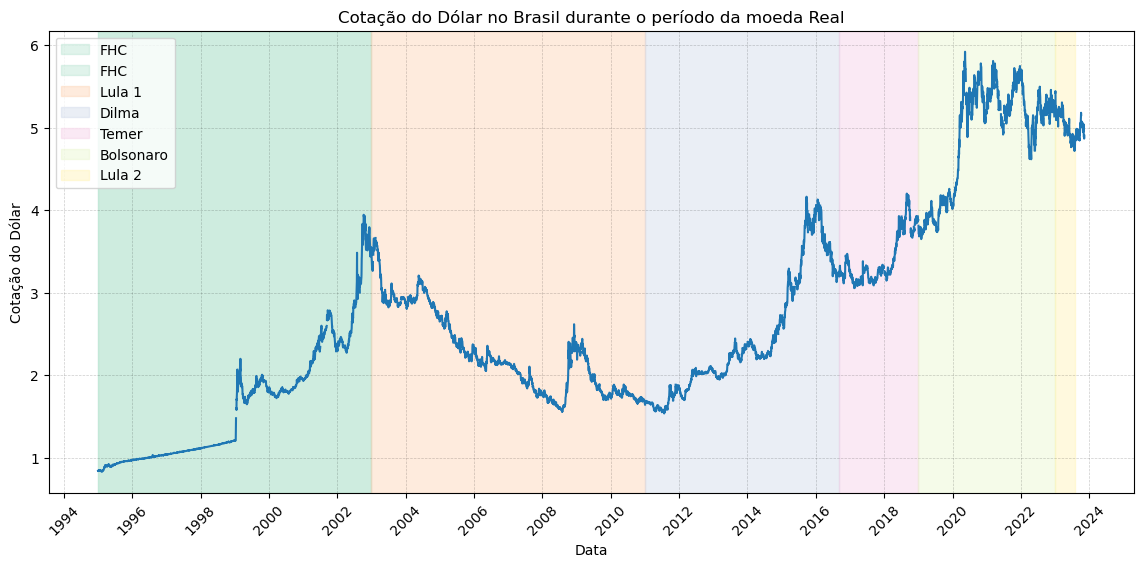

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,6))

ax.plot(df_dollar.index, df_dollar["value"])
ax.set_title("Cotação do Dólar no Brasil durante o período da moeda Real")
ax.set_ylabel("Cotação do Dólar")
ax.set_xlabel("Data")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.2)

cores = plt.cm.Pastel2.colors

ax.axvspan(presidentes["FHC"][0], presidentes["FHC"][1], color=cores[0], alpha=0.4, label="FHC")

for presidente, periodo, cor in zip (presidentes.keys(), presidentes.values(), cores):
    ax.axvspan(periodo[0], periodo[1], color=cor, alpha=0.4, label=presidente)
    
    #datas
from matplotlib.dates import YearLocator

ax.xaxis.set_major_locator(YearLocator(2))
ax.xaxis.set_tick_params(rotation=45)

ax.legend()

plt.show()

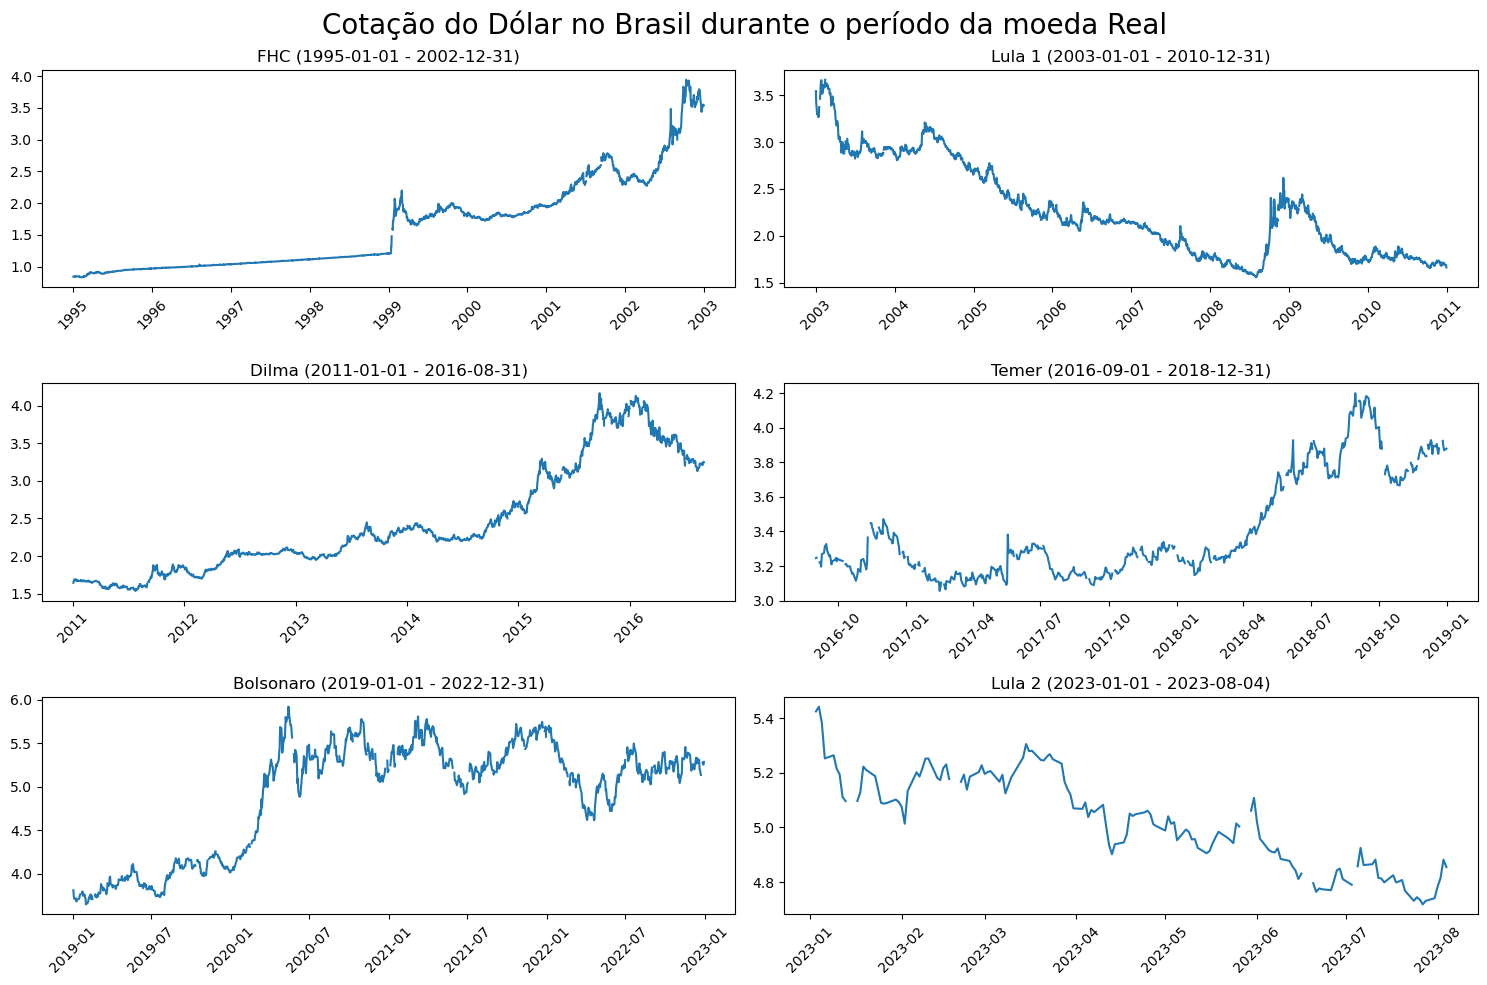

In [70]:
# criando um grid de subplots 3 x 2, ficando um subplot para cada presidente
fig, axs = plt.subplots(3, 2, figsize=(15, 10), tight_layout=True)

# iterando sobre os presidentes e os subplots
for presidente, periodo, ax in zip(presidentes.keys(), presidentes.values(), axs.flat):
    df_temp = df_dollar.loc[presidentes[presidente][0] : presidentes[presidente][1]]
    ax.plot(df_temp.index, df_temp["value"])
    # rotacionando os ticks do eixo x
    ax.xaxis.set_tick_params(rotation=45)
    
    # colocando o título de cada subplot com o nome do presidente e o período
    ax.set_title(f"{presidente} ({periodo[0]} - {periodo[1]})")
    

fig.suptitle("Cotação do Dólar no Brasil durante o período da moeda Real", fontsize=20)

plt.show()

In [71]:
df_dollar.loc[presidentes["FHC"][0]:presidentes["FHC"][1]]

,value
date,
1995-01-02,0.844
1995-01-03,0.845
1995-01-04,0.845
1995-01-05,0.843
1995-01-06,0.840
...,...
2002-12-25,NaN
2002-12-26,3.541
2002-12-27,3.554
